In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

eventos = pd.read_csv('events.csv',low_memory=False)

In [2]:
eventos['timestamp'] = pd.to_datetime(eventos['timestamp'])

In [3]:
eventos.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

# Análisis sobre los usuarios con más eventos en el site

### Los 10 usuarios con más eventos

In [4]:
eventos['person'].value_counts().head(10)

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
Name: person, dtype: int64

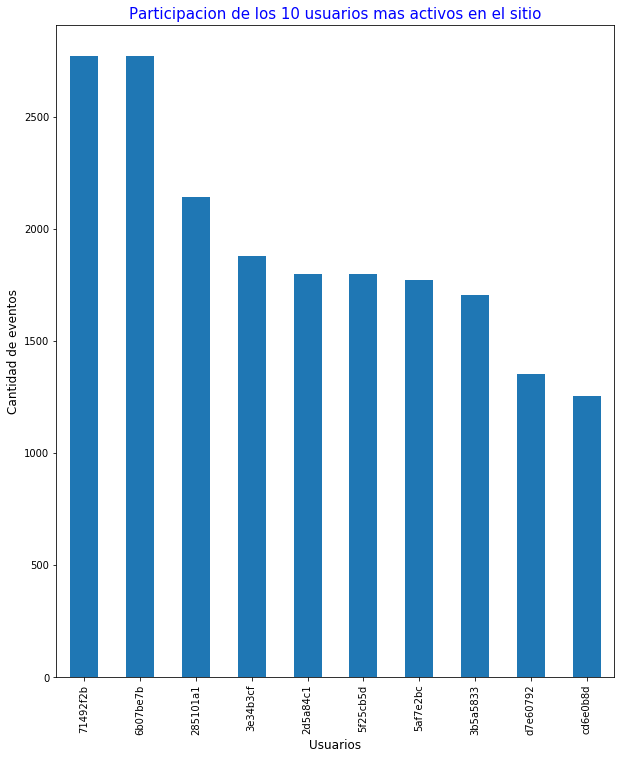

In [5]:
usuariosConMasEventos = eventos.groupby('person').agg({'event':'size'})
plot = usuariosConMasEventos.sort_values('event',ascending = False).head(10).plot(kind = 'bar',legend=False,figsize = (10,12))
plot.set_title('Participación de los 10 usuarios más activos en el sitio', fontsize=15,color = 'blue')
plot.set_xlabel('Usuarios',fontsize=12)
plot.set_ylabel('Cantidad de eventos',fontsize=12)
plt.show()

Tanto el primer como el segundo usuario son demasiados interactivos diferenciados con los demás usuarios.

## ¿Qué hacen los 5 usuarios más activos?

In [30]:
eventosDeLosUsuariosTops = eventos.loc[((eventos['person'] == '71492f2b')
                                        |(eventos['person'] =='6b07be7b')
                                        |(eventos['person'] =='285101a1')
                                        |(eventos['person'] =='3e34b3cf')
                                        |(eventos['person'] =='2d5a84c1')),:]

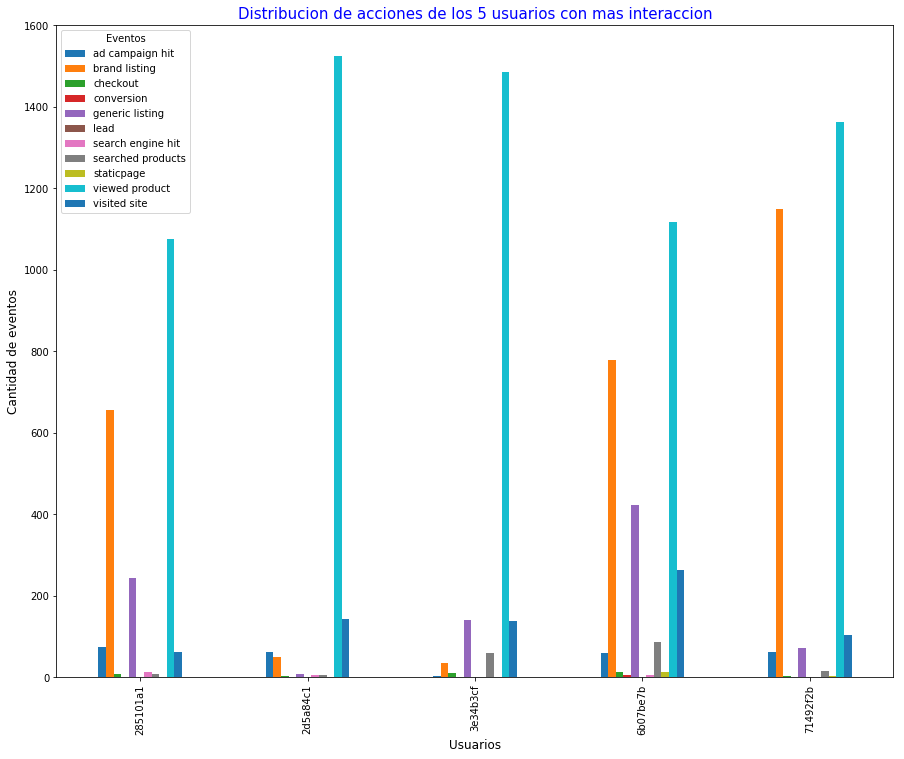

In [31]:
plot = eventosDeLosUsuariosTops.groupby(['person','event']).agg({'event':'size'}).unstack().plot(kind='bar',figsize = (15,12))
plot.set_title('Distribucion de acciones de los 5 usuarios con mas interaccion', fontsize=15,color = 'blue')
plot.set_xlabel('Usuarios',fontsize=12)
plot.set_ylabel('Cantidad de eventos',fontsize=12)
plot.legend(['ad campaign hit','brand listing','checkout','conversion','generic listing','lead','search engine hit','searched products','staticpage','viewed product','visited site'],fontsize=10,title='Eventos')
plt.show()

Se ve con claridad que los usuarios con más interacción se la pasan viendo productos, y en algunos de los usuarios, hay una gran cantidad visitas de algún listado específico de alguna marca viendo conjuntos
de productos.

### Y cual es la relación compra/vista de celulares?

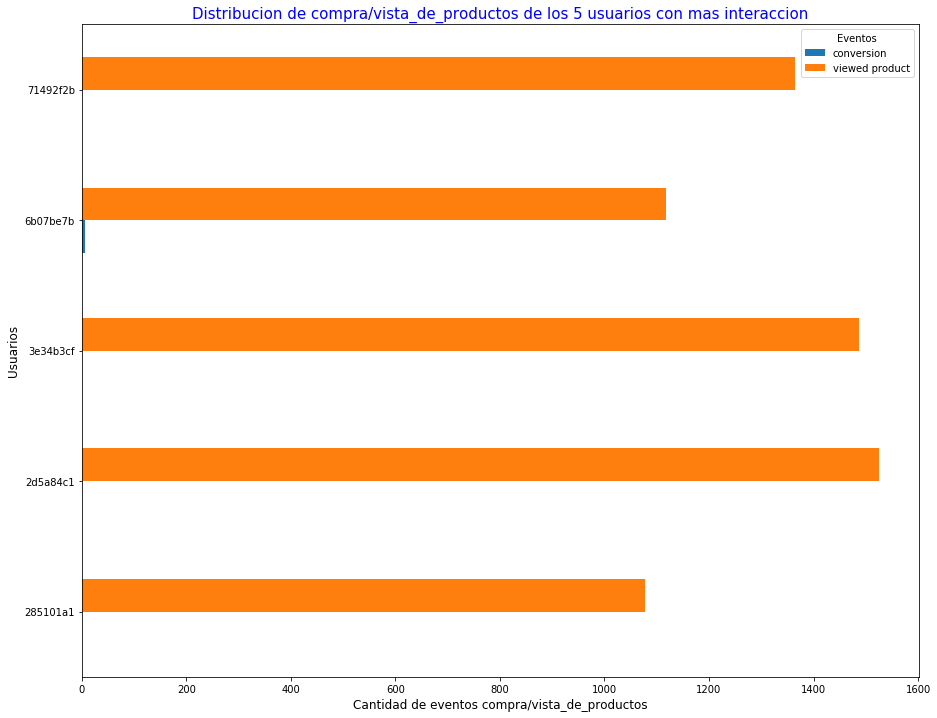

In [42]:
usuariosQueCompran = eventosDeLosUsuariosTops.loc[(eventosDeLosUsuariosTops['event'] == 'conversion') | (eventosDeLosUsuariosTops['event'] == 'viewed product'),:]
plot = usuariosQueCompran.groupby(['person','event']).agg({'person':'size'}).unstack(1).plot(kind = 'barh',stacked=False,figsize = (15,12))
plot.set_title('Distribucion de compra/vista_de_productos de los 5 usuarios con mas interaccion', fontsize=15,color = 'blue')
plot.set_xlabel('Cantidad de eventos compra/vista_de_productos',fontsize=12)
plot.set_ylabel('Usuarios',fontsize=12)
plot.legend(['conversion','viewed product'],fontsize=10,title='Eventos')
plt.show()

In [33]:
usuariosQueCompran['event'].value_counts()

viewed product    6571
conversion           7
Name: event, dtype: int64

Debe ser que esos 5 usuarios solamente se centran en buscar buenas oportunidades y en caso de encontrarlo, realizan una compra, eso explica la gran cantidad de vistas y la poca compra que realizan los usuarios.

### Y qué miran?

In [34]:
modelosVistosDeLosUsuariosTops = eventosDeLosUsuariosTops.loc[eventosDeLosUsuariosTops['event'] == 'viewed product',:]
modelosVistosDeLosUsuariosTops['model'].value_counts().head(10)

iPhone 5s                      325
Motorola Moto G4 Plus          320
Samsung Galaxy J7 Prime        258
iPhone 7                       239
Samsung Galaxy S7 Edge         221
Samsung Galaxy Note 8          202
Samsung Galaxy S8 Plus         199
iPhone 7 Plus                  163
Samsung Galaxy A5 2017         135
Samsung Galaxy S6 Edge Plus    134
Name: model, dtype: int64

Se ve a simple vista que estos usuarios buscan oportunidades sobre modelos de iphone, motorola y samsung.

### Y de qué manera buscan oportunidades?

In [35]:
eventosDeBusquedaDeLosUsuariosTops = eventosDeLosUsuariosTops.groupby(['person','search_term']).agg({'person':'size'})
eventosDeBusquedaDeLosUsuariosTops = eventosDeBusquedaDeLosUsuariosTops.loc[eventosDeBusquedaDeLosUsuariosTops['person'] >= 3,:]
eventosDeBusquedaDeLosUsuariosTops

person
person   search_term              
285101a1 j5 prime                5
3e34b3cf Iphone 5                4
         Iphone 5s               6
         Iphone 6                6
         Samsung galaxy s5       4
         Samsung galaxy s6       8
6b07be7b 32gb                   10
         A5                      3
         A7                      3
         A8                      3
         A9                      5
         J5                      3
         J7                      6
         Lg g4                   3
         On7                     7
         Samsung                 6
71492f2b moto z                  6
         s7                      5

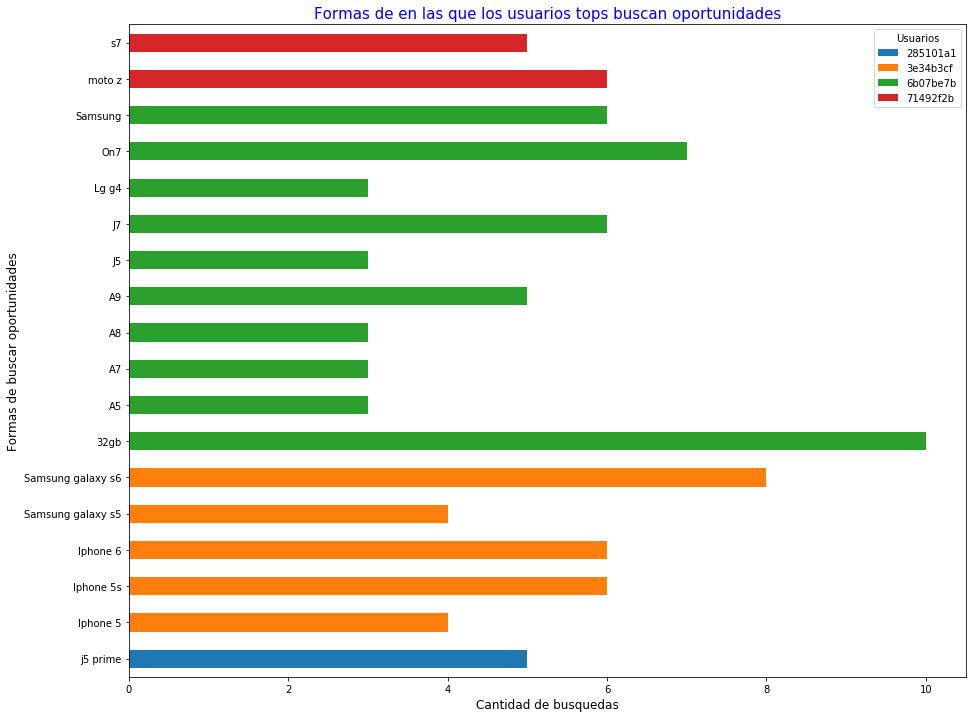

In [36]:
plot = eventosDeBusquedaDeLosUsuariosTops.unstack(0).plot(kind = 'barh',stacked=True,figsize = (15,12))
plot.set_title('Formas de en las que los usuarios tops buscan oportunidades', fontsize=15,color = 'blue')
plot.set_xlabel('Cantidad de busquedas',fontsize=12)
plot.set_ylabel('Formas de buscar oportunidades',fontsize=12)
plot.legend(['285101a1','3e34b3cf','6b07be7b','71492f2b'],fontsize=10,title='Usuarios')
plt.show()

Una consideración es el otro usuario top5 que falta es porque realizó muchas búsquedas pero nunca repitió la manera de buscar.

Es interante observar como buscan estos usuarios, desde el modelo de una marca(siguen siendo búsquedas sobre modelos de marcas ya destacadas) hasta una búsqueda por capacidad como un requisito mínimo.

### Y en qué momento se mantuvieron activos esos usuarios y cuantos eventos hicieron?

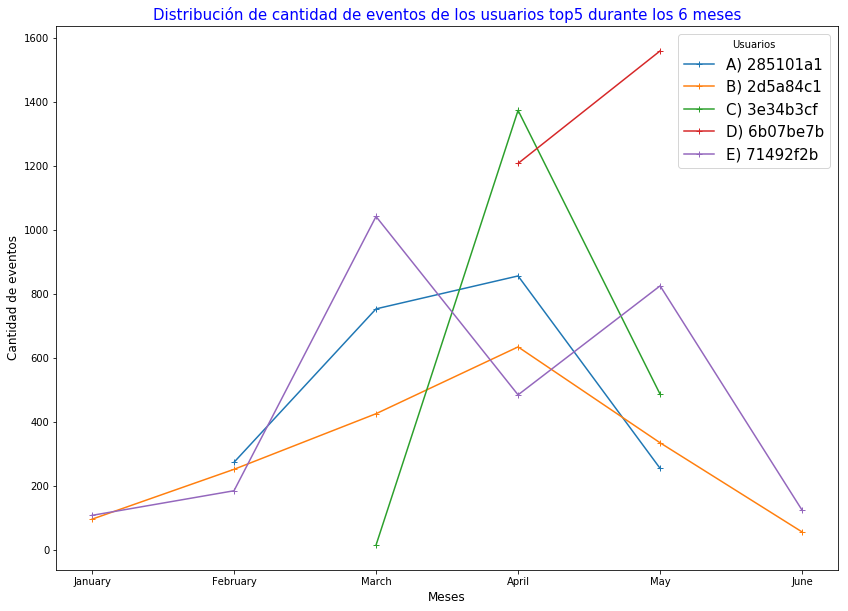

In [43]:
eventosDeLosUsuariosFiltrado = eventosDeLosUsuariosTops.loc[:,['timestamp','event','person']]
eventosDeLosUsuariosFiltrado['monthOfEvent'] = eventosDeLosUsuariosFiltrado['timestamp'].dt.month
plot = eventosDeLosUsuariosFiltrado.groupby(['monthOfEvent','person']).agg({'person':'size'}).unstack(1).plot(kind='line',style='+-',figsize=(14,10))
plot.set_title('Distribución de cantidad de eventos de los usuarios top5 durante los 6 meses', fontsize=15,color = 'blue')
plot.set_xlabel('Meses',fontsize=12)
plot.set_ylabel('Cantidad de eventos',fontsize=12)
plot.legend(['A) 285101a1','B) 2d5a84c1','C) 3e34b3cf','D) 6b07be7b','E) 71492f2b'],fontsize=15,title='Usuarios')
plot.set_xticklabels(['','January','February','March','April','May','June'])
plt.show()

Puede apreciarce que solo dos usuarios (B y E) fueron constantes en el sitio durante los 6 meses, por su parte los otros usuarios sólo participaron en algunos meses, por ejemplo, el usuario D solo participó durante dos meses (esa actividad se refleja en la linea roja).

### Y qué es lo que hace el usuario top del site?

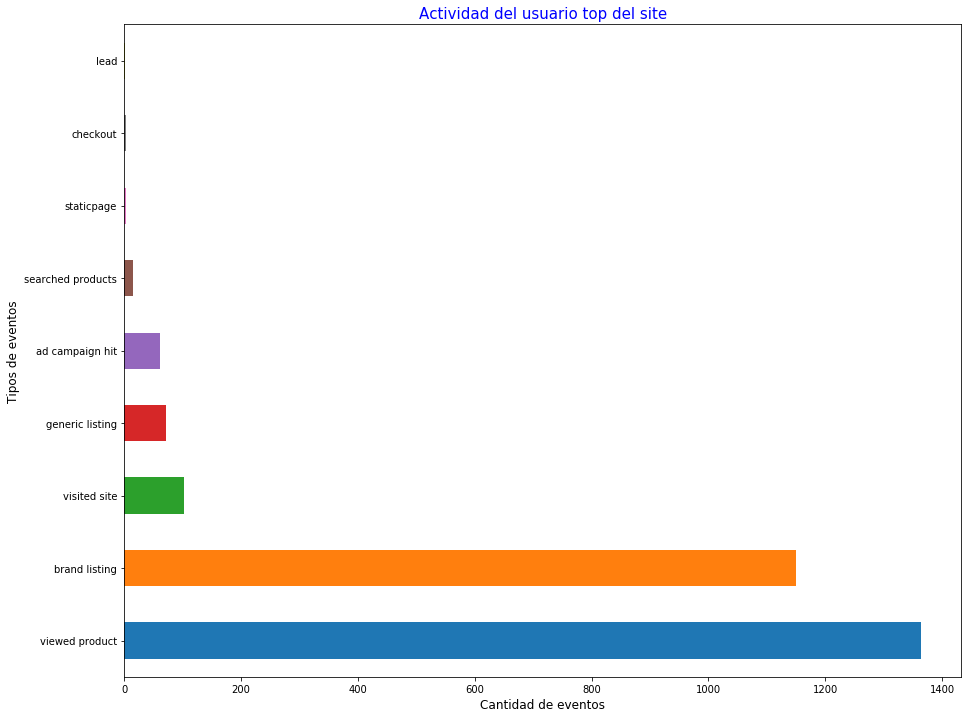

In [52]:
usuarioTop = eventos.loc[(eventos['person'] == '71492f2b'),:]
plot = usuarioTop['event'].value_counts().plot(kind='barh',figsize = (15,12))
plot.set_title('Actividad del usuario top del site', fontsize=15,color = 'blue')
plot.set_xlabel('Cantidad de eventos',fontsize=12)
plot.set_ylabel('Tipos de eventos',fontsize=12)
plt.show()

Se puede observar lo explicado anteriormente, el usuario top solamente mira productos o busca productos de alguna determinada marca.

La inexistencia de conversion es debido a que en los 6 meses jamás realizó una compra.

### Y cómo se comporta durante el mes?

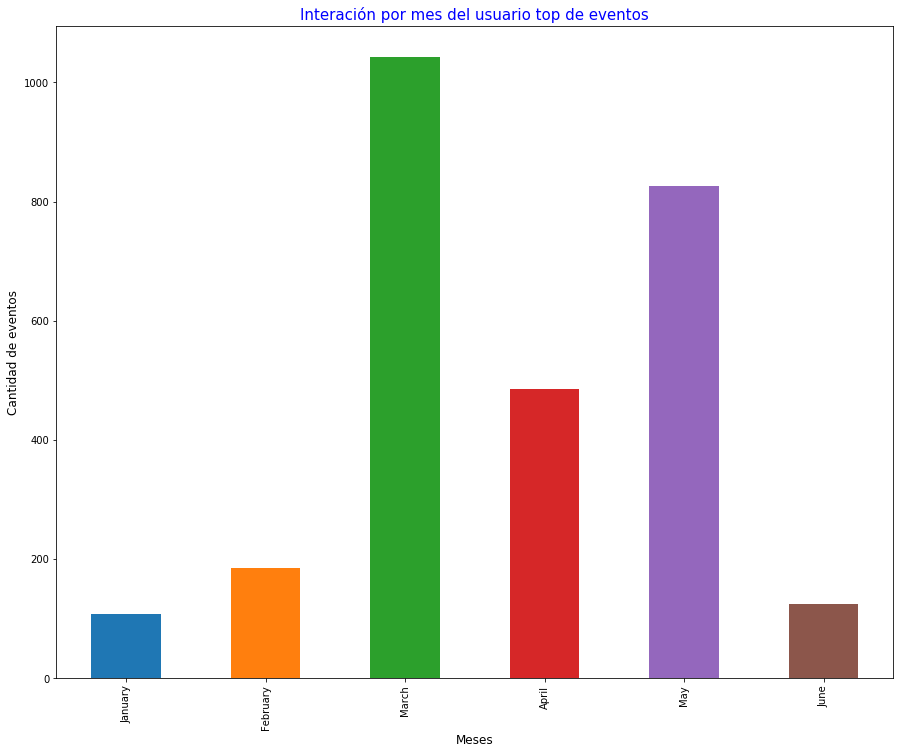

In [38]:
plot = usuarioTop['timestamp'].dt.month.value_counts().sort_index().plot(kind= 'bar',figsize = (15,12))
plot.set_title('Interacción por mes del usuario top de eventos', fontsize=15,color = 'blue')
plot.set_xlabel('Meses',fontsize=12)
plot.set_ylabel('Cantidad de eventos',fontsize=12)
plot.set_xticklabels(['January','February','March','April','May','June'])
plt.show()

El usuario realizó más eventos sobre el sitio en el mes de Marzo, casualmente o no, coincide con el mes de más ventas del sitio explicado en otra notebook.

#### Y cuál es su rango horario de más actividad?

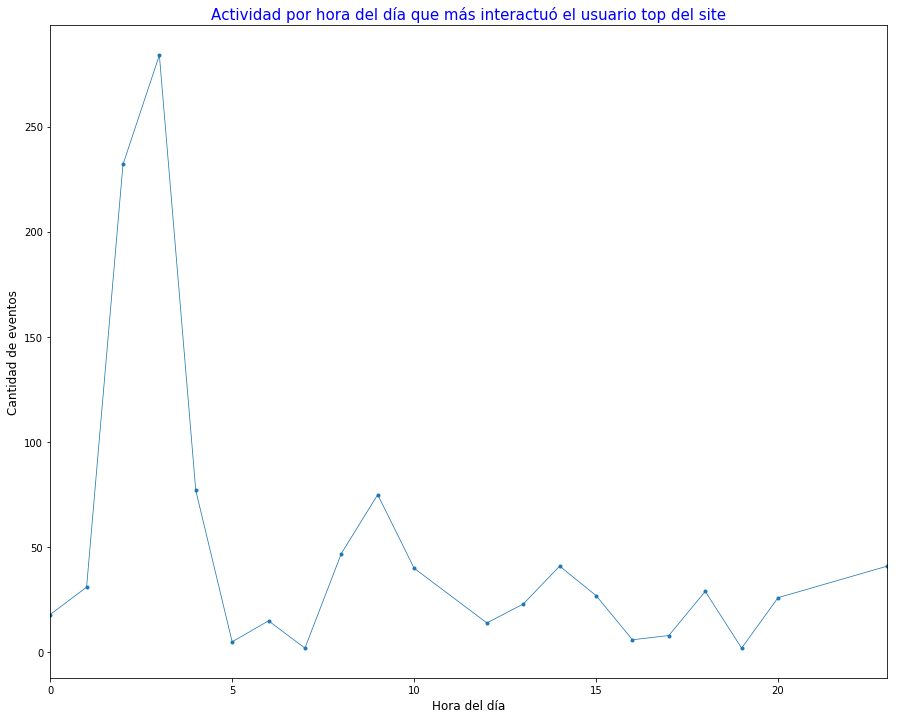

In [53]:
usuarioTop = usuarioTop.loc[usuarioTop['timestamp'].dt.month == 3] ## Es el mes de más actividad del usuarioTop
plot = usuarioTop['timestamp'].dt.hour.value_counts().sort_index(ascending = True).plot(kind = 'line',style='.-',lw=0.75,figsize = (15,12))
plot.set_xlabel('Hora del día',fontsize=12)
plot.set_ylabel('Cantidad de eventos',fontsize=12)
plot.set_title('Actividad por hora del día que más interactuó el usuario top del site', fontsize=15,color = 'blue')
plot.set_xlim([0,23])
plt.show()

El gráfico es elocuente, el usuario registra muchísima actividad en el rango de 0 a 5 horas de la madrugada, llegando a un pico de interacción a las 3 de la madrugada.

### A continuación se analizará que hace en su mes más activo.

In [40]:
usuarioTop['diaDelMes'] = usuarioTop['timestamp'].dt.day
usuarioTop = usuarioTop.loc[:,['event','diaDelMes']]
plotNuevo = usuarioTop.groupby(['event','diaDelMes']).agg(np.size).reset_index()

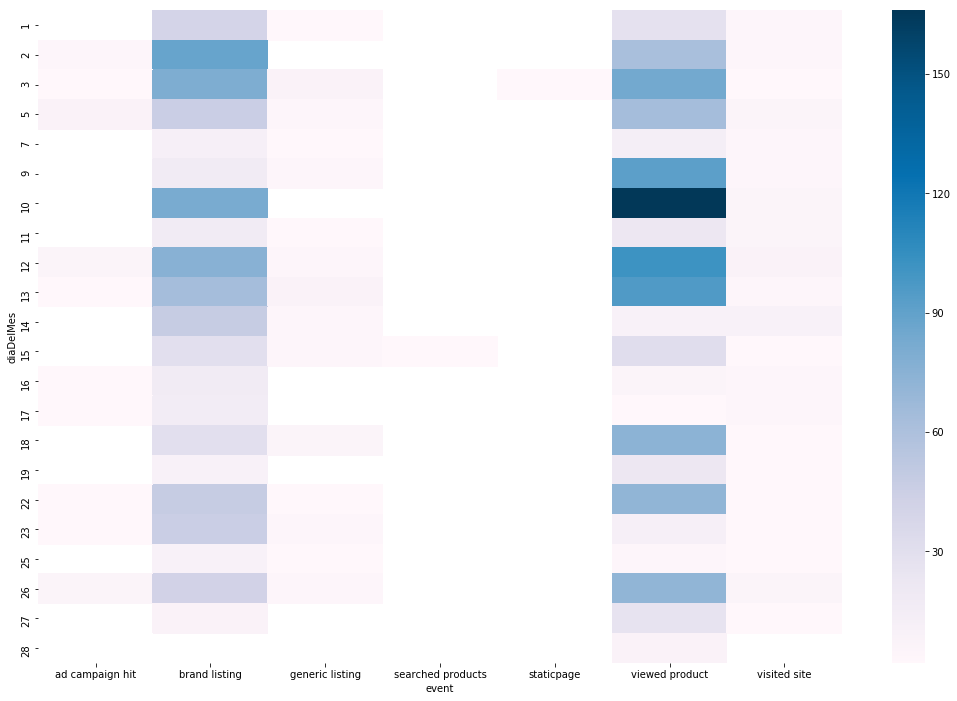

In [41]:
pivoted = pd.pivot_table(plotNuevo,values=0,columns='event', \
               index='diaDelMes')
fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
sns.heatmap(pivoted,cmap='PuBu');

Cómo se puede observar, durante el día 10 del mes de Marzo el usuario top realiza muchísimas vistas de productos y visita algunos listados específicos de alguna marca viendo un conjunto de productos.
Siguiendo la densidad de eventos, se puede observar que el usuario se la pasa viendo productos.

Algo a destacar durante el mes de Marzo, el usuario top el día 29, 30, 4, 6 y 24 no realiza ningún tipo de interacción en el sitio (esa es la razón por la cual no aparece en la escala del día del mes). 